In [1]:
import tensorflow
import numpy as np 
import pandas as pd
import re
import wordcloud
import csv

In [2]:
pd.read_csv('data/train.csv')

,instance,type,posts
0,3629,INFJ,ok by me :happy: It will give me time to orga...
1,4105,ISTJ,'ask him straight up|||kiss- isxp marry- isfp ...
2,7127,ENTJ,'Thank you!|||This exactly. I think my SO is a...
3,358,INTP,'Never mind.|||Your brain doesn't ever change ...
4,1082,ENTP,I always thought you had an abundance of Ne.||...
5,59,INTJ,I feel some way about people that can't solve ...
6,4375,INTJ,"'It was too easy when I was younger, so I stop..."
7,4777,INTJ,'The series' audience is kids in their school ...
8,5078,INFJ,'The best relationship to be in is one where b...
9,87,ISFJ,'i beat that by seeking out a housemate that w...


In [3]:
full_training_data = pd.read_csv('data/train.csv')
full_training_data = full_training_data.assign(ie=full_training_data['type'].str[0],
                                               sn=full_training_data['type'].str[1],
                                               tf=full_training_data['type'].str[2],
                                               pj=full_training_data['type'].str[3],
                                              )

full_training_data['clean_text'] = full_training_data['posts'].apply(lambda x: re.sub('[^a-z]+', ' ', x.lower()))

full_training_data_words = pd.DataFrame(full_training_data.clean_text.str.split(' ').tolist(), 
                                  full_training_data.instance
                                 ).stack()
full_training_data_words = full_training_data_words.reset_index()[[0, 'instance']]
full_training_data_words.columns = ['word', 'instance']
full_training_data_words = full_training_data_words[full_training_data_words.word != ""]

full_training_data_words = full_training_data[["instance", "ie", "sn", "tf", "pj"]].set_index('instance').join(
                                            full_training_data_words.set_index('instance')
                                            ).reset_index()


testing_data = pd.read_csv('data/test.csv')
testing_data['clean_text'] = testing_data['posts'].apply(
    lambda x: re.sub('[^a-z]+', ' ', x.lower())
)

testing_data = pd.DataFrame(testing_data.clean_text.str.split(' ').tolist(), 
                            testing_data.instance).stack()
testing_data_words = testing_data.reset_index()[[0, 'instance']]
testing_data_words.columns = ['word', 'instance']

EDA


(-0.5, 399.5, 199.5, -0.5)

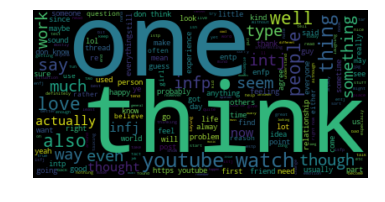

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
cloud = wordcloud.WordCloud().generate(" ".join(full_training_data_words["word"]))

plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

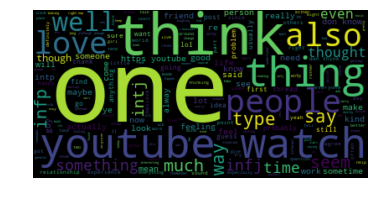

In [5]:
introvert_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.ie == "I"]["word"])
)

plt.imshow(introvert_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

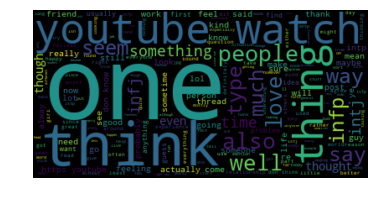

In [6]:
extravert_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.ie == "I"]["word"])
)

plt.imshow(extravert_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

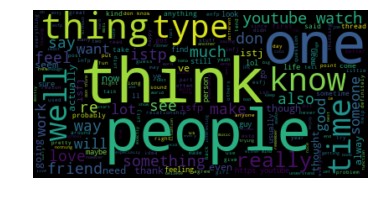

In [7]:
sensing_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.sn == "S"]["word"])
)

plt.imshow(sensing_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

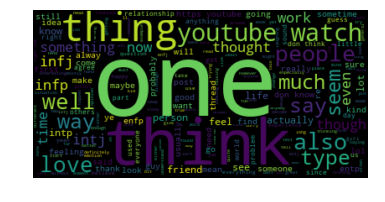

In [8]:
intuitive_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.sn == "N"]["word"])
)

plt.imshow(intuitive_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

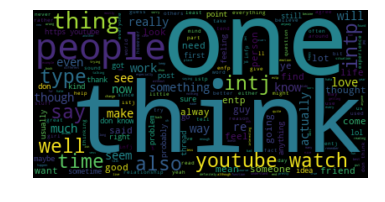

In [9]:
thinking_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.tf == "T"]["word"])
)

plt.imshow(thinking_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

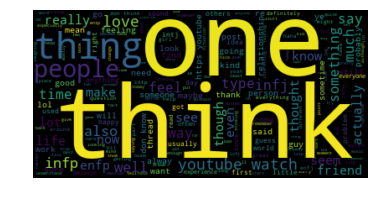

In [10]:
feeling_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.tf == "F"]["word"])
)

plt.imshow(feeling_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

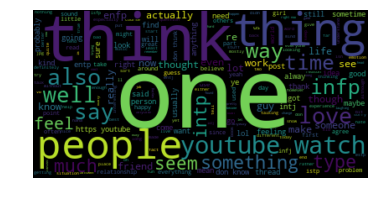

In [11]:
percieving_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.pj == "P"]["word"])
)

plt.imshow(percieving_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

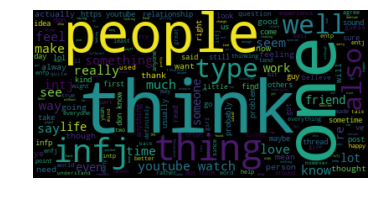

In [12]:
judging_cloud = wordcloud.WordCloud().generate(
    " ".join(full_training_data_words.loc[full_training_data_words.pj == "J"]["word"])
)

plt.imshow(judging_cloud, interpolation='bilinear')
plt.axis("off")

How we're going to featurize?

2 Step process
1. [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
    - way to rank the important words in each document
2. [GloVe](https://nlp.stanford.edu/projects/glove/) word embeddings on the most prominent words

In [13]:
full_training_data_words['term_frequency'] = 0
training_data_tf = full_training_data_words[['instance', 'word', 'term_frequency']].groupby(['instance', 'word']).agg("count")

testing_data_words['term_frequency'] = 0
testing_data_tf = testing_data_words[['instance', 'word', 'term_frequency']].groupby(['instance', 'word']).agg("count")

training_data_tf

term_frequency
instance word                       
0        a                        17
         about                     2
         again                     1
         ages                      1
         ago                       1
         ahh                       1
         all                       4
         alternative               1
         always                    1
         am                        1
         an                        3
         and                      13
         any                       1
         apis                      1
         appears                   1
         aq                        1
         are                       2
         area                      1
         around                    1
         artist                    1
         artists                   2
         as                        4
         assets                    1
         at                        3
         aug                       1
         avid                      1
         b                         4
         baby                      1
         backyard                  2
         banned                    7
...                              ...
8674     when                      6
         whenever                  1
         where                     1
         while                     2
         white                     3
         who                       6
         wilderness                1
         will                      5
         window                    2
         wipes                     1
         with                     11
         without                   1
         wolf                      2
         won                       3
         work                      3
         worker                    1
         world                     5
         would                     5
         wouldn                    1
         wrong                     2
         www                       3
         xd                        1
         yea                       1
         yes                       2
         you                      15
         young                     1
         your                      8
         yours                     1
         yourself                  2
         youtube                   3

[3651859 rows x 1 columns]

In [14]:
document_frequency = training_data_tf.reset_index()[['instance','word']].set_index("word").groupby("word").agg("count")
document_frequency = document_frequency.loc[document_frequency['instance'] >= 10] # drop terms that exist in less that 10 documents
document_frequency

,instance
word,
a,6939
aa,96
aaaaaaaaa,18
aaaaand,12
aaaah,15
aaaand,17
aaah,19
aaand,13
aah,16


In [15]:
total_count = len(document_frequency)
document_frequency['idf'] = np.log(
                                float(total_count) / document_frequency['instance']
                            )
idf_table = document_frequency.reset_index()[['word', 'idf']]
idf_table.sort_values(by="idf")

,word,idf
0,a,0.956708
7737,i,0.956708
16288,to,0.956852
16058,the,0.956996
618,and,0.957285
11052,of,0.957429
8512,is,0.957573
8548,it,0.958006
17979,you,0.958150
7943,in,0.959161


In [16]:
training_tfidf = training_data_tf.reset_index().set_index('word').join(idf_table.set_index('word'), how='inner')
training_tfidf = training_tfidf.reset_index()
training_tfidf['tfidf'] = (1+np.log(training_tfidf['term_frequency']))*training_tfidf['idf']

testing_tfidf = testing_data_tf.reset_index().set_index('word').join(idf_table.set_index('word'), how='inner')
testing_tfidf = testing_tfidf.reset_index()
testing_tfidf['tfidf'] = (1+np.log(testing_tfidf['term_frequency']))*testing_tfidf['idf']

training_tfidf

,word,instance,term_frequency,idf,tfidf
0,a,0,17,0.956708,3.667266
1,a,1,26,0.956708,4.073755
2,a,3,23,0.956708,3.956460
3,a,5,37,0.956708,4.411302
4,a,6,39,0.956708,4.461667
5,a,7,26,0.956708,4.073755
6,a,8,27,0.956708,4.109861
7,a,9,26,0.956708,4.073755
8,a,10,44,0.956708,4.577072
9,a,12,29,0.956708,4.178227


In [17]:
highest_training_tfidf = training_tfidf[['instance', 'word', 'tfidf']].set_index("word").groupby(['instance'])['tfidf'].nlargest(10).reset_index()

highest_testing_tfidf = testing_tfidf[['instance', 'word', 'tfidf']].set_index("word").groupby(['instance'])['tfidf'].nlargest(10).reset_index()


In [18]:
highest_training_tfidf

,instance,word,tfidf
0,0,banned,14.173329
1,0,dp,10.894259
2,0,pokemon,10.557985
3,0,backyard,10.436618
4,0,moderation,10.188397
5,0,diary,9.176171
6,0,cavemen,7.499036
7,0,artists,7.351705
8,0,happenings,7.316714
9,0,revel,7.316714


In [19]:
glove = pd.read_table('glove/glove.6B.50d.txt', sep=' ', index_col=0, header=None, quoting=csv.QUOTE_NONE)

In [20]:
glove

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.412420,0.121700,0.345270,-0.044457,-0.496880,-0.178620,-0.000660,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.442510,0.187850,0.002785,-0.184110,-0.115140,-0.785810
",",0.013441,0.236820,-0.168990,0.409510,0.638120,0.477090,-0.428520,-0.556410,-0.364000,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.227860,0.360340,-0.378180,-0.566570,0.044691,0.303920
.,0.151640,0.301770,-0.167630,0.176840,0.317190,0.339730,-0.434780,-0.310860,-0.449990,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.139310,0.223140,-0.080803,-0.356520,0.016413,0.102160
of,0.708530,0.570880,-0.471600,0.180480,0.544490,0.726030,0.181570,-0.523930,0.103810,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.389880,0.229020,-0.216170,-0.225620,-0.093918,-0.803750
to,0.680470,-0.039263,0.301860,-0.177920,0.429620,0.032246,-0.413760,0.132280,-0.298470,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.197220,0.082279,-0.094340,-0.073297,-0.064699,-0.260440
and,0.268180,0.143460,-0.278770,0.016257,0.113840,0.699230,-0.513320,-0.473680,-0.330750,-0.138340,...,-0.069043,0.368850,0.251680,-0.245170,0.253810,0.136700,-0.311780,-0.632100,-0.250280,-0.380970
in,0.330420,0.249950,-0.608740,0.109230,0.036372,0.151000,-0.550830,-0.074239,-0.092307,-0.328210,...,-0.486090,-0.008027,0.031184,-0.365760,-0.426990,0.421640,-0.116660,-0.507030,-0.027273,-0.532850
a,0.217050,0.465150,-0.467570,0.100820,1.013500,0.748450,-0.531040,-0.262560,0.168120,0.131820,...,0.138130,0.369730,-0.642890,0.024142,-0.039315,-0.260370,0.120170,-0.043782,0.410130,0.179600
"""",0.257690,0.456290,-0.769740,-0.376790,0.592720,-0.063527,0.205450,-0.573850,-0.290090,-0.136620,...,0.030498,-0.395430,-0.385150,-1.000200,0.087599,-0.310090,-0.346770,-0.314380,0.750040,0.970650


In [21]:
training_with_glove = highest_training_tfidf[['instance', 'word']].set_index('word').join(glove.reset_index().set_index(0), how='inner')
testing_with_glove = highest_testing_tfidf[['instance', 'word']].set_index('word').join(glove.reset_index().set_index(0), how='inner')

In [22]:
featurized_training = training_with_glove.reset_index().drop('index', axis=1).groupby('instance').sum()
training_magnitude = featurized_training[1]*0
for i in range(1, 51): # features of x
    training_magnitude += featurized_training[i]**2

for i in range(1, 51):
    featurized_training[i] = featurized_training[i] / training_magnitude # normalization

featurized_testing = testing_with_glove.reset_index().drop('index', axis=1).groupby('instance').sum()
testing_magnitude = featurized_testing[1]*0
for i in range(1, 51): # features of x
    testing_magnitude += featurized_training[i]**2

for i in range(1, 51):
    featurized_testing[i] = featurized_testing[i] / testing_magnitude # normalization
    
featurized_training

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
instance,,,,,,,,,,,,,,,,,,,,,
0,0.000372,-0.001298,-0.010062,0.001355,-0.005022,-0.006287,-0.008383,-0.014052,-0.003321,0.010114,...,0.000825,-0.003857,-0.003016,0.016385,0.012746,0.000269,-0.000613,-0.002917,-0.003722,-0.001532
1,-0.006824,-0.006367,0.007478,0.014629,-0.005119,0.002251,-0.007300,-0.003362,0.004598,0.000668,...,0.006190,-0.002087,-0.009160,-0.001811,0.002467,-0.000759,0.004361,-0.007137,-0.004017,-0.005253
3,0.006406,0.000425,-0.013927,0.000148,-0.000447,0.000337,0.013514,-0.008110,-0.001856,0.015368,...,-0.009213,-0.003473,-0.005136,0.009033,-0.009436,-0.005015,0.011228,0.006944,-0.002455,0.004098
5,0.000211,-0.018337,-0.004811,-0.009200,0.006490,0.005712,0.001549,-0.004857,-0.008143,0.007790,...,0.002786,0.004478,0.002383,0.006946,0.003760,-0.009377,0.007509,0.002630,0.006239,0.002147
6,0.007253,0.011320,-0.000309,-0.005211,-0.005087,0.003551,0.005003,0.001285,0.000416,0.001116,...,0.003874,-0.009900,0.005984,0.002938,-0.000188,0.004671,0.012981,-0.000446,0.000618,0.003864
7,-0.000916,0.001911,0.002414,-0.010966,0.003653,-0.001730,0.002944,-0.000487,-0.002043,0.005744,...,0.001038,-0.002603,0.000982,0.014752,-0.012192,0.002602,0.013320,0.001145,-0.000839,-0.009248
8,0.009903,-0.006805,-0.005869,0.002846,0.004691,0.003766,0.006486,0.002056,0.011632,0.017744,...,0.007043,0.007308,-0.015438,0.010698,-0.004815,0.008983,0.004357,-0.000306,0.002203,0.004779
9,0.006662,0.001315,-0.002986,-0.006207,0.001163,0.002566,0.003559,-0.006805,0.002235,0.008130,...,0.001804,-0.001529,-0.000435,0.001685,0.003642,0.003647,0.002501,-0.003127,-0.000188,0.006028
10,0.003701,-0.001179,-0.003764,0.000056,0.011367,0.000579,-0.008022,0.000436,-0.000829,0.001616,...,-0.003731,-0.001446,-0.000469,0.007575,0.005279,-0.001729,-0.003099,-0.006604,0.004023,-0.002939


In [27]:
full_training_featurized = full_training_data.set_index('instance')[['ie', 'sn', 'tf', 'pj']].join(featurized_training)
full_training_featurized

,ie,sn,tf,pj,1,2,3,4,5,6,...,41,42,43,44,45,46,47,48,49,50
instance,,,,,,,,,,,,,,,,,,,,,
3629,I,N,F,J,-0.007057,0.011834,-0.006989,-0.005588,0.001824,-0.003786,...,-0.000680,0.000563,-0.007457,-0.000792,-0.001238,0.001799,-0.003256,-0.004807,0.001807,0.006461
4105,I,S,T,J,-0.010595,-0.003893,-0.003998,-0.001171,0.000272,0.001339,...,-0.003302,-0.000975,0.004997,0.012581,-0.003539,-0.004653,-0.002117,0.009464,0.002484,0.015821
7127,E,N,T,J,0.006943,-0.004974,-0.002881,-0.000854,-0.008003,-0.003119,...,-0.010723,-0.000851,0.006810,0.001517,0.000906,0.003234,0.001323,0.007701,-0.000370,-0.000787
358,I,N,T,P,0.004971,0.002491,-0.001977,-0.010121,0.006501,0.001179,...,-0.001910,-0.005556,-0.002658,0.006724,0.002027,0.001406,0.002798,0.004720,-0.000559,-0.007140
1082,E,N,T,P,-0.005518,-0.013836,-0.000653,-0.022463,-0.008961,0.001532,...,0.003058,0.000124,0.000085,-0.001071,0.017762,-0.000640,0.010176,0.001667,0.012328,-0.006646
59,I,N,T,J,0.005496,-0.016923,0.002353,-0.003627,0.004239,0.003851,...,0.000374,-0.001072,-0.004279,0.009227,-0.001462,0.002938,-0.000676,0.004286,0.007045,0.003323
4375,I,N,T,J,-0.001455,0.000493,-0.003069,-0.007051,0.004451,0.000301,...,0.001886,-0.006067,-0.001422,0.012858,0.000376,0.001671,-0.003497,0.006543,-0.004860,-0.006801
4777,I,N,T,J,0.003416,-0.004457,0.002819,-0.002996,-0.000930,0.002626,...,0.004037,-0.011160,0.011770,0.009662,-0.004666,-0.002340,0.001461,0.016813,0.001325,-0.000458
5078,I,N,F,J,0.009547,-0.006512,0.001096,-0.004917,0.006475,0.002340,...,-0.003150,-0.004453,0.009139,0.009850,0.012124,-0.001870,-0.004001,-0.005334,-0.004746,-0.005077


In [29]:
full_training_featurized.to_csv('featurized_train.csv')
featurized_testing.to_csv('featurized_test.csv')

In [31]:
full_training_featurized['Y'] = full_training_featurized

np.random.seed(seed=1) # for consistency with sets
training_data, validation_data = np.split(full_training_featurized.sample(frac=1), [int(.75*len(full_training_featurized))]) # splitting into training and validation sets



In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(training_data)

0.75

In [36]:
training_data[1:]

,ie,sn,tf,pj,1,2,3,4,5,6,...,41,42,43,44,45,46,47,48,49,50
instance,,,,,,,,,,,,,,,,,,,,,
1820,E,N,T,P,-0.009651,-0.003393,0.001568,0.004702,-0.002529,0.001252,...,0.006265,0.005629,-0.006625,0.004887,0.006599,-0.003078,0.006340,-0.000708,0.003360,0.000486
4279,E,N,F,J,-0.004934,-0.000651,0.017715,-0.001154,-0.001697,-0.012052,...,0.004727,-0.009836,0.005363,0.005246,-0.003287,-0.000488,0.000281,0.000945,0.011595,0.009164
2458,I,N,F,P,0.013855,0.006778,0.009381,0.012612,0.004596,-0.001242,...,0.010302,-0.005246,-0.013317,0.012842,-0.006400,0.002556,0.002881,-0.001820,-0.005418,-0.005794
4455,I,N,F,P,0.005246,-0.003484,-0.004207,0.001504,0.006818,0.001538,...,-0.001212,0.000573,-0.004150,0.000602,0.002118,0.000902,0.003981,-0.003628,-0.000148,-0.004160
3147,E,N,F,J,0.003609,-0.012824,-0.000375,-0.002844,0.004154,-0.003737,...,0.002261,-0.005007,0.000403,0.011292,-0.000186,-0.002708,0.008090,0.005045,0.001069,0.003161
5326,I,N,F,J,-0.004678,-0.004995,-0.003933,-0.009245,0.000283,0.008824,...,0.004669,0.001591,-0.002973,0.012708,0.006481,0.007231,0.005509,0.012328,-0.007353,0.005544
2286,E,N,F,J,0.005194,-0.007178,-0.003797,-0.003153,-0.000023,0.004754,...,-0.004843,0.002840,-0.007644,0.005837,-0.002317,0.002448,0.005882,-0.001968,-0.003948,-0.004238
3837,E,N,T,J,-0.001509,-0.006473,0.002693,-0.000825,0.005179,0.001521,...,0.000063,-0.004639,0.000659,0.008504,0.001622,0.005416,0.002616,0.006181,0.004426,0.002169
7219,I,S,F,J,0.004445,0.005569,-0.008314,-0.003366,0.006510,0.003371,...,-0.004062,-0.004200,0.001612,0.009879,0.008329,-0.001853,0.005050,-0.001058,0.001577,-0.005954
